# Explaining Models with SHAP

## Import model

In [1]:
import joblib
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [2]:
# Create new variable with values from loaded dic 
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

In [3]:
# Import shap and initialize javascript:
import shap
shap.initjs()

## Global Explanation

In [5]:
# Create X_shap and y_shap variable
X_shap = shap.sample(X_test_df,nsamples=400,random_state=321)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
6304    17.700000         0.116724  182.4266                     1999.0   
2164    12.904458         0.045867   37.9506                     1985.0   
7870    11.100000         0.053731  165.1526                     1987.0   
5840     6.635000         0.006352  120.3098                     2009.0   
6000    12.904458         0.021273  229.1326                     1985.0   
...           ...              ...       ...                        ...   
4705    12.904458         0.077428   41.8454                     1985.0   
5141    16.700000         0.052493  113.9176                     1999.0   
1020    12.150000         0.063431   65.4826                     1998.0   
7787    16.350000         0.032539  165.7842                     1997.0   
17       9.000000         0.069196   54.3614                     1999.0   

      Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
6304                       0.0                     0.0               0.0   
2164                       1.0                     0.0               0.0   
7870                       1.0                     0.0               0.0   
5840                       1.0                     1.0               0.0   
6000                       0.0                     0.0               0.0   
...                        ...                     ...               ...   
4705                       0.0                     0.0               0.0   
5141                       1.0                     0.0               0.0   
1020                       0.0                     0.0               0.0   
7787                       0.0                     0.0               0.0   
17                         1.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
6304                  0.0               0.0              0.0  ...   
2164                  0.0               0.0              0.0  ...   
7870                  0.0               0.0              0.0  ...   
5840                  0.0               0.0              0.0  ...   
6000                  1.0               0.0              0.0  ...   
...                   ...               ...              ...  ...   
4705                  0.0               0.0              0.0  ...   
5141                  0.0               0.0              0.0  ...   
1020                  0.0               0.0              0.0  ...   
7787                  0.0               0.0              0.0  ...   
17                    1.0               0.0              0.0  ...   

      Outlet_Size_Medium  Outlet_Size_Small  Outlet_Size_missing_value  \
6304                 1.0                0.0                        0.0   
2164                 1.0                0.0                        0.0   
7870                 0.0                0.0                        0.0   
5840                 1.0                0.0                        0.0   
6000                 1.0                0.0                        0.0   
...                  ...                ...                        ...   
4705                 0.0                1.0                        0.0   
5141                 1.0                0.0                        0.0   
1020                 0.0                0.0                        1.0   
7787                 0.0                1.0                        0.0   
17                   1.0                0.0                        0.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
6304                          1.0                          0.0   
2164                          0.0                          0.0   
7870                          0.0                          0.0   
5840                          0.0                          0.0   
6000                          0.0                          0.0   
...                           ...                          ...   
4705        

In [6]:
y_shap = y_test.loc[X_shap.index]
y_shap 

6304    5163.9448
2164     910.8144
7870    1480.0734
5840    1446.1176
6000    7393.0432
          ...    
4705      41.9454
5141    2519.3872
1020     258.3304
7787    2652.5472
17       718.3982
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [7]:
explainer = shap.Explainer(loaded_model)
explainer

In [8]:
# Getting the shap values
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(400, 42)

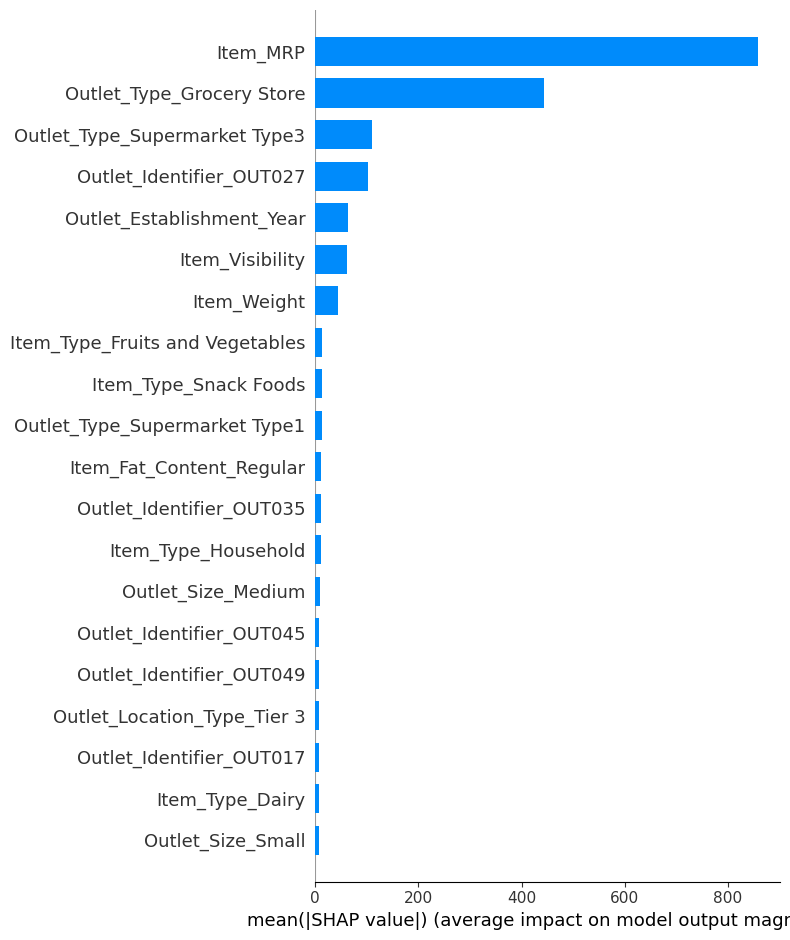

In [11]:
# Plot shap with plot_type = bar
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

<img src=top10_most_important_features.png>
Comparing Feature importance with Feature importance according to SHAP 

- re-plotting Feature importance from RF regressor model due to markdown cell not displaying my saved plot img when doing `![](url)` or `![](path)` or `<img src = url>` just keep getting broken img icon

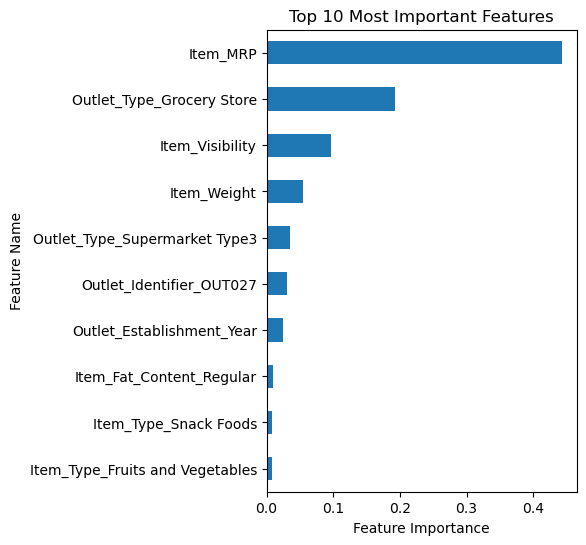

In [12]:
# Re-plot Feature importance for comparison
import pandas as pd
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.Series(loaded_model.feature_importances_, index=feature_names,
                        name='RandomForestRegressor Feature Importances')
ax = feature_importance.sort_values().tail(10).plot(kind='barh',figsize=(4,6))
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 10 Most Important Features');

- As we can see above, SHAP's Top-2 importances are similar with built-in random forest importances but the rest are not the same. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


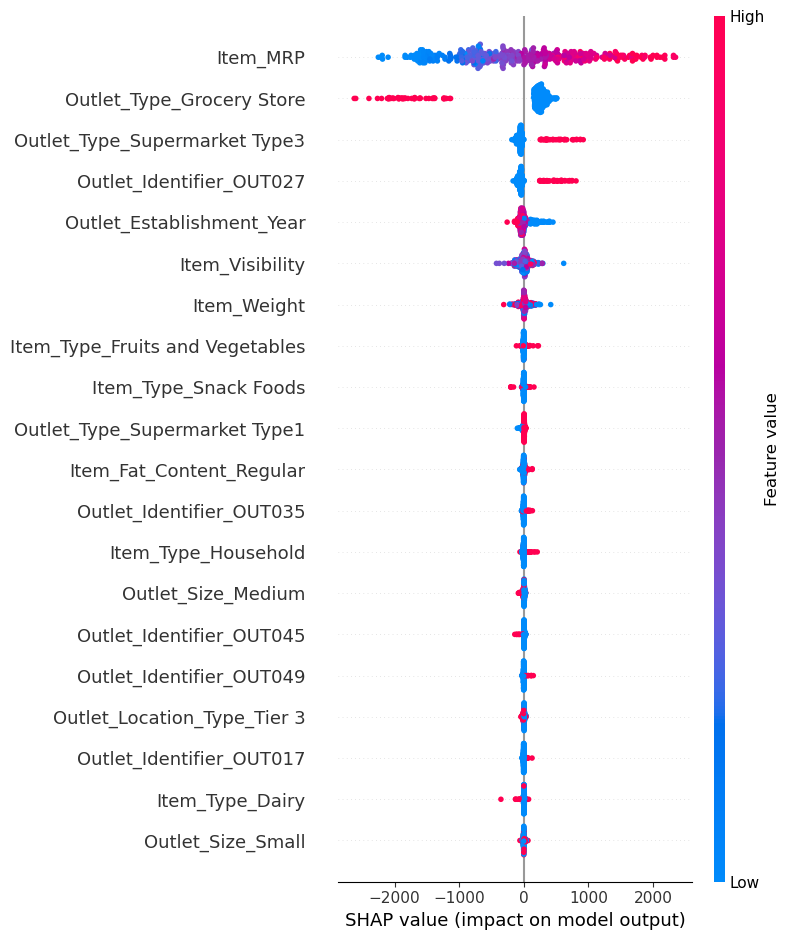

In [13]:
# Plot the default Shap summary
shap.summary_plot(shap_values,X_shap)

- Reading SHAP Top3 Summary Plots
    - "Item_MRP" - Higher(red) item_MRP have positive impact on our model and opposite can be said to lower(blue) feature value item_MRP
    - "Outlet_Type_Grocery Store" - Items that are sold under outlet_type Grocery store have negative impact on our model output which make sense because based on our EDA Grocery store has the smallest distribution relative to other outlet_type
    - "Outlet_Type_Supermarket Type3" - the opposite of Grocery store, Supermarket Type3 holds the top spot of highest avg item_outlet_sales compared to other outlet_type based on our EDA which explain why it has high possitive impact on our model output

## Local Explanation

- Will be using Rows 39 and 96 Examples for Model oberservation Local Explanation
    - Row 39 - Is an item sold by OUT027, Outlet_Type_Supermarket Type3 which are 2 of the top5 high positive impact according to our previous SHAP Global Explanation result
    - Row 96 - Is an item sold by Outlet_Type_Grocery Store which is 2nd most impact and high negative impact according to our previous SHAP Global Explanation result

![](C:\Users\kdelfino\Documents\GitHub\Sales-prediction\image\top10_most_important_features.png)

In [35]:
X_shap.sample(5)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
348    17.850000         0.065798  147.8050                     2004.0   
96     19.600000         0.056744   55.6614                     1998.0   
198    10.300000         0.070149  264.5226                     1999.0   
371     7.670000         0.185597   35.7216                     2009.0   
50     12.904458         0.020770  117.5782                     1985.0   

     Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
348                       0.0                     0.0               0.0   
96                        0.0                     0.0               0.0   
198                       0.0                     0.0               0.0   
371                       0.0                     0.0               0.0   
50                        0.0                     0.0               0.0   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
348                  0.0               0.0              0.0  ...   
96                   0.0               0.0              0.0  ...   
198                  0.0               0.0              1.0  ...   
371                  0.0               0.0              0.0  ...   
50                   0.0               0.0              1.0  ...   

     Outlet_Size_Medium  Outlet_Size_Small  Outlet_Size_missing_value  \
348                 0.0                1.0                        0.0   
96                  0.0                0.0                        1.0   
198                 1.0                0.0                        0.0   
371                 1.0                0.0                        0.0   
50                  1.0                0.0                        0.0   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
348                          0.0                          1.0   
96                           0.0                          0.0   
198                          1.0                          0.0   
371                          0.0                          0.0   
50                           0.0                          0.0   

     Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
348                          0.0                        0.0   
96                           1.0                        1.0   
198                          0.0                        0.0   
371                          1.0                        0.0   
50                           1.0                        0.0   

     Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
348                            1.0                            0.0   
96                             0.0                            0.0   
198                            1.0                            0.0   
371                            0.0                            1.0   
50                             0.0                            0.0   

     Outlet_Type_Supermarket Type3  
348                            0.0  
96                             0.0  
198                            0.0  
371                            0.0  
50                             1.0  

[5 rows x 42 columns]

In [28]:
# Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [29]:
X_shap.sample(5)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
39     12.904458         0.008499   81.3618                     1985.0   
373    12.904458         0.116762  198.9768                     1985.0   
271     9.800000         0.026082  217.5850                     2004.0   
149     6.055000         0.031230  160.3578                     2009.0   
9      12.904458         0.133144  190.8846                     1985.0   

     Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
39                        0.0                     1.0               0.0   
373                       0.0                     0.0               0.0   
271                       0.0                     0.0               0.0   
149                       0.0                     0.0               0.0   
9                         1.0                     0.0               0.0   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
39                   0.0               0.0              0.0  ...   
373                  0.0               1.0              0.0  ...   
271                  0.0               0.0              0.0  ...   
149                  0.0               0.0              0.0  ...   
9                    0.0               0.0              0.0  ...   

     Outlet_Size_Medium  Outlet_Size_Small  Outlet_Size_missing_value  \
39                  1.0                0.0                        0.0   
373                 1.0                0.0                        0.0   
271                 0.0                1.0                        0.0   
149                 1.0                0.0                        0.0   
9                   0.0                1.0                        0.0   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
39                           0.0                          0.0   
373                          0.0                          0.0   
271                          0.0                          1.0   
149                          0.0                          0.0   
9                            1.0                          0.0   

     Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
39                           1.0                        0.0   
373                          1.0                        0.0   
271                          0.0                        0.0   
149                          1.0                        0.0   
9                            0.0                        1.0   

     Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
39                             0.0                            0.0   
373                            0.0                            0.0   
271                            1.0                            0.0   
149                            0.0                            1.0   
9                              0.0                            0.0   

     Outlet_Type_Supermarket Type3  
39                             1.0  
373                            1.0  
271                            0.0  
149                            0.0  
9                              0.0  

[5 rows x 42 columns]

### First Example - Row 39

In [47]:
# Selecting a row
row = 39
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 39
- Target: 1530.6742


Item_Weight                          12.90
Item_Visibility                       0.01
Item_MRP                             81.36
Outlet_Establishment_Year          1985.00
Item_Fat_Content_Regular              0.00
Item_Type_Baking Goods                1.00
Item_Type_Breads                      0.00
Item_Type_Breakfast                   0.00
Item_Type_Canned                      0.00
Item_Type_Dairy                       0.00
Item_Type_Frozen Foods                0.00
Item_Type_Fruits and Vegetables       0.00
Item_Type_Hard Drinks                 0.00
Item_Type_Health and Hygiene          0.00
Item_Type_Household                   0.00
Item_Type_Meat                        0.00
Item_Type_Others                      0.00
Item_Type_Seafood                     0.00
Item_Type_Snack Foods                 0.00
Item_Type_Soft Drinks                 0.00
Item_Type_Starchy Foods               0.00
Outlet_Identifier_OUT010              0.00
Outlet_Identifier_OUT013              0.00
Outlet_Iden

In [48]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [49]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_model.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- As we can see in the LIME explanation above, there were many factors contributing to the predicted Item_Outlet_sale, such as:
    - Is the Outlet type - Grocery store (False - positive impact)
    - Item_MRP (low MRP - negative impact)
    - Is the item sold by OUT027 (True - positive impact)


In [50]:
# getting the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp_df

Effect        Value
0      Outlet_Type_Grocery Store <= 0.00  2057.484709
1                      Item_MRP <= 89.14 -1646.670984
2   Outlet_Type_Supermarket Type3 > 0.00   523.723048
3        Outlet_Identifier_OUT027 > 0.00   489.058731
4              Item_Type_Seafood <= 0.00  -348.407375
5   Outlet_Establishment_Year <= 1987.00   146.321536
6       Outlet_Identifier_OUT019 <= 0.00   102.711710
7       Outlet_Identifier_OUT045 <= 0.00   101.956426
8               Item_Type_Others <= 0.00    88.733098
9  Outlet_Type_Supermarket Type2 <= 0.00    86.752896

In [51]:
# Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])

- Here we can see how much each feature affects the model prediction for example Row 39
    - base value 54.01(min)~7562.66(max)
    - Item_MRP has the most influence driving our prediction to be on the lower-end relative to base value due to having lower Item_MRP value
    - Outlet_Identifier_OUT027 and Outlet_Type_Supermarket Type3 have the 2nd and 3rd most influence with our model prediction respectively, Pushing our model to stay closer to the base value offsetting the negative impact of item_MRP.

### Second Example - Row 96 

In [52]:
# Selecting a row
row = 96
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 96
- Target: 165.7842


Item_Weight                          19.60
Item_Visibility                       0.06
Item_MRP                             55.66
Outlet_Establishment_Year          1998.00
Item_Fat_Content_Regular              0.00
Item_Type_Baking Goods                0.00
Item_Type_Breads                      0.00
Item_Type_Breakfast                   0.00
Item_Type_Canned                      0.00
Item_Type_Dairy                       0.00
Item_Type_Frozen Foods                0.00
Item_Type_Fruits and Vegetables       0.00
Item_Type_Hard Drinks                 0.00
Item_Type_Health and Hygiene          0.00
Item_Type_Household                   0.00
Item_Type_Meat                        0.00
Item_Type_Others                      0.00
Item_Type_Seafood                     0.00
Item_Type_Snack Foods                 0.00
Item_Type_Soft Drinks                 1.00
Item_Type_Starchy Foods               0.00
Outlet_Identifier_OUT010              1.00
Outlet_Identifier_OUT013              0.00
Outlet_Iden

In [53]:
# Instantiate Explainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [54]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_model.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- As we can see in the LIME explanation above, there were many factors contributing to the predicted Item_Outlet_sale, such as:
    - Is the Outlet type - Grocery store (True - Negative impact)
    - Item_MRP (low MRP - negative impact)
    - Is the item sold by OUT027 (False - Negative impact)

In [55]:
# Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])

- Here we can see how much each feature affects the model prediction for example Row 96:
    - Base Value - 52.98(min)~7575.22(max) / Predicted Value : 157.18
    - Outlet_Type_Grocery Store has the most influence driving our prediction to be on the lower-end relative to base value due to the item being sold at a grocery store and having lower Item_MRP value